# Denoising types
- Total variation (TV)
- Bilateral
- Wavelet denoising
- Non-local means denoising

In [1]:
# Ensure necessary modules are installed
%pip install matplotlib numpy opencv-python pandas scikit-image tqdm ipywidgets tensorflow-macos tensorflow-metal scikit-image


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Bilateral denoise
 - Grayscaled Images

In [12]:
import glob
import random
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.restoration import denoise_bilateral

# Set the seed for reproducibility
random.seed(0)

# Get image paths
vehicle = sorted(glob.glob('./VehicleImage/vehicles/*/*.png'))
nonvehicle = sorted(glob.glob('./VehicleImage/non-vehicles/*/*.png'))

# Shuffle the image paths
random.shuffle(vehicle)
random.shuffle(nonvehicle)

# Function to denoise images using bilateral filter from skimage
def denoise_image_bilateral(image_path):
    img = img_as_float(io.imread(image_path))
    denoised_img = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15,bins=2, channel_axis=-1, multichannel=True)
    return denoised_img

# Denoise vehicle images
denoised_vehicle_bilateral = [denoise_image_bilateral(img_path) for img_path in vehicle]

# Denoise non-vehicle images
denoised_nonvehicle_bilateral = [denoise_image_bilateral(img_path) for img_path in nonvehicle]


# Function to display images
def display_images(original_paths, denoised_images, title):
    n = len(original_paths)
    plt.figure(figsize=(20, 10))
    for i in range(n):
        # Display original image
        plt.subplot(2, n, i + 1)
        original_img = io.imread(original_paths[i])
        plt.imshow(original_img)
        plt.title(f'Original {title} {i+1}')
        plt.axis('off')
        
        # Display denoised image
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(denoised_images[i])
        plt.title(f'Denoised {title} {i+1}')
        plt.axis('off')
    plt.show()



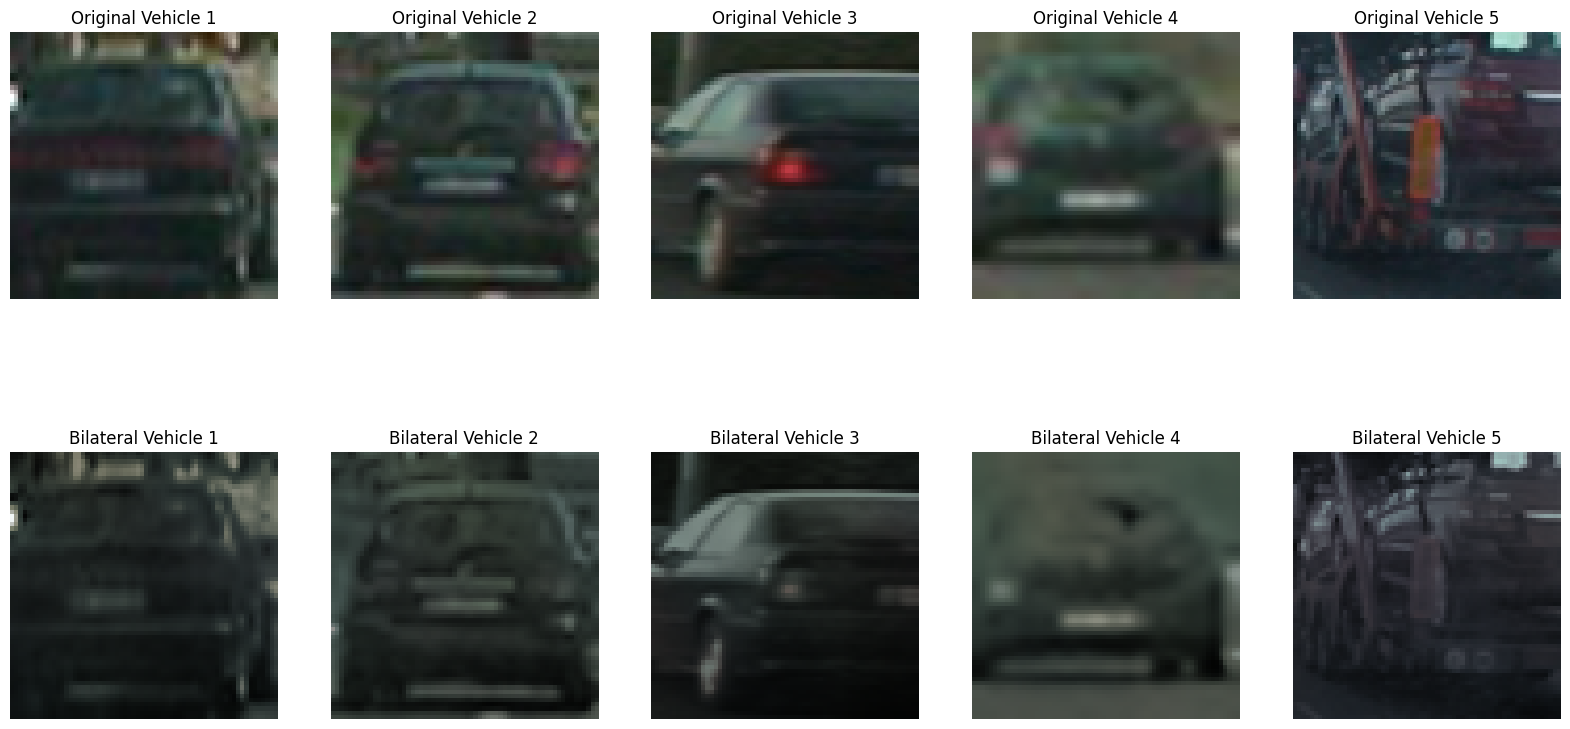

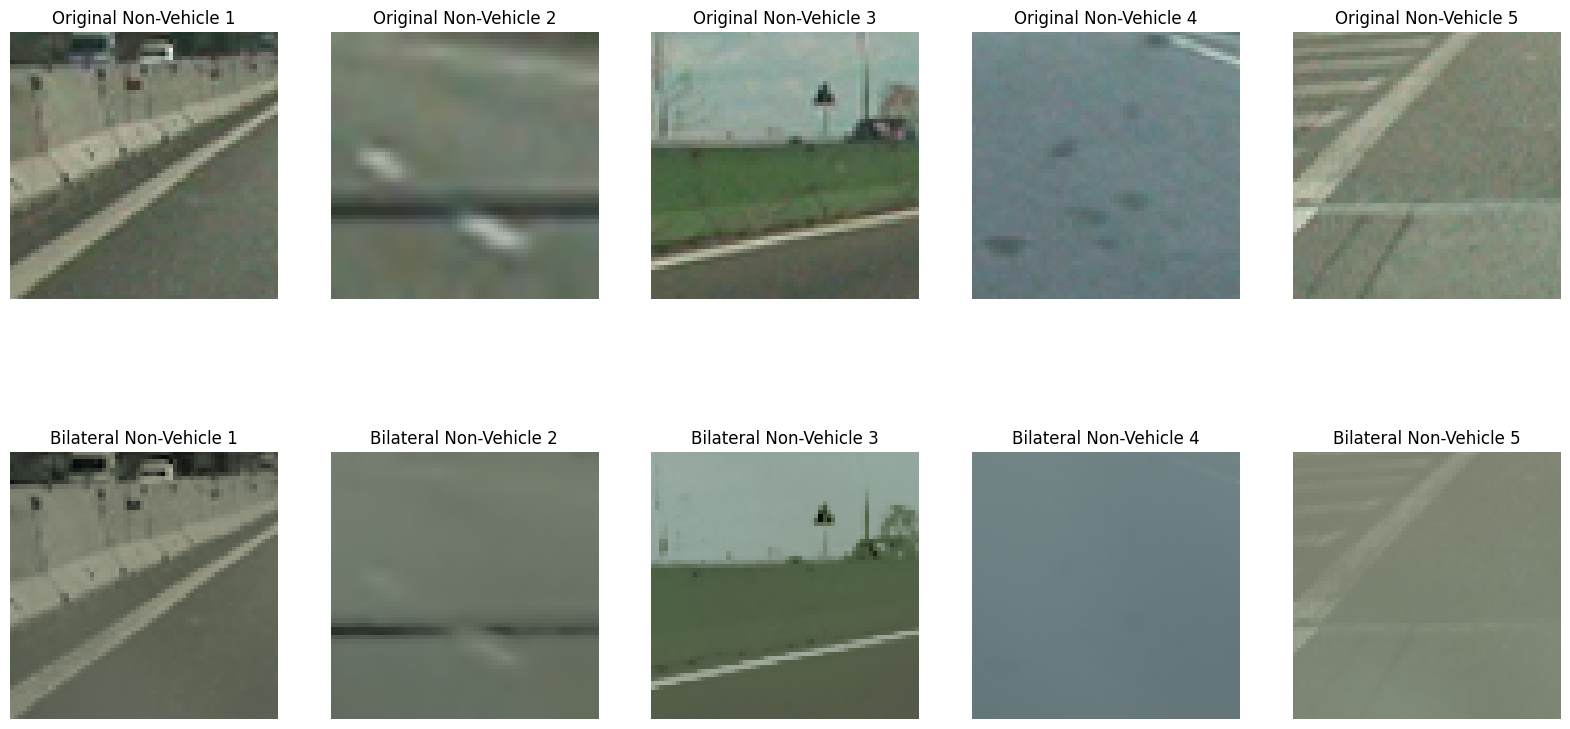

In [13]:
# Display vehicle images
display_images(vehicle[:5], denoised_vehicle_bilateral[:5], 'Vehicle')

# Display non-vehicle images
display_images(nonvehicle[:5], denoised_nonvehicle_bilateral[:5], 'Non-Vehicle')


- apply bilateral-filter and get colored images instead of grascaled

In [25]:
def denoise_image_bilateral(image_path):
    img = img_as_float(io.imread(image_path))
    denoised_img = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15, bins=2, channel_axis=-1)
    return denoised_img



# Denoise vehicle images
denoised_vehicle_bilateral_colored = [denoise_image_bilateral(img_path) for img_path in vehicle]

# Denoise non-vehicle images
denoised_nonvehicle_bilateral_colored = [denoise_image_bilateral(img_path) for img_path in`` nonvehicle]



KeyboardInterrupt: 

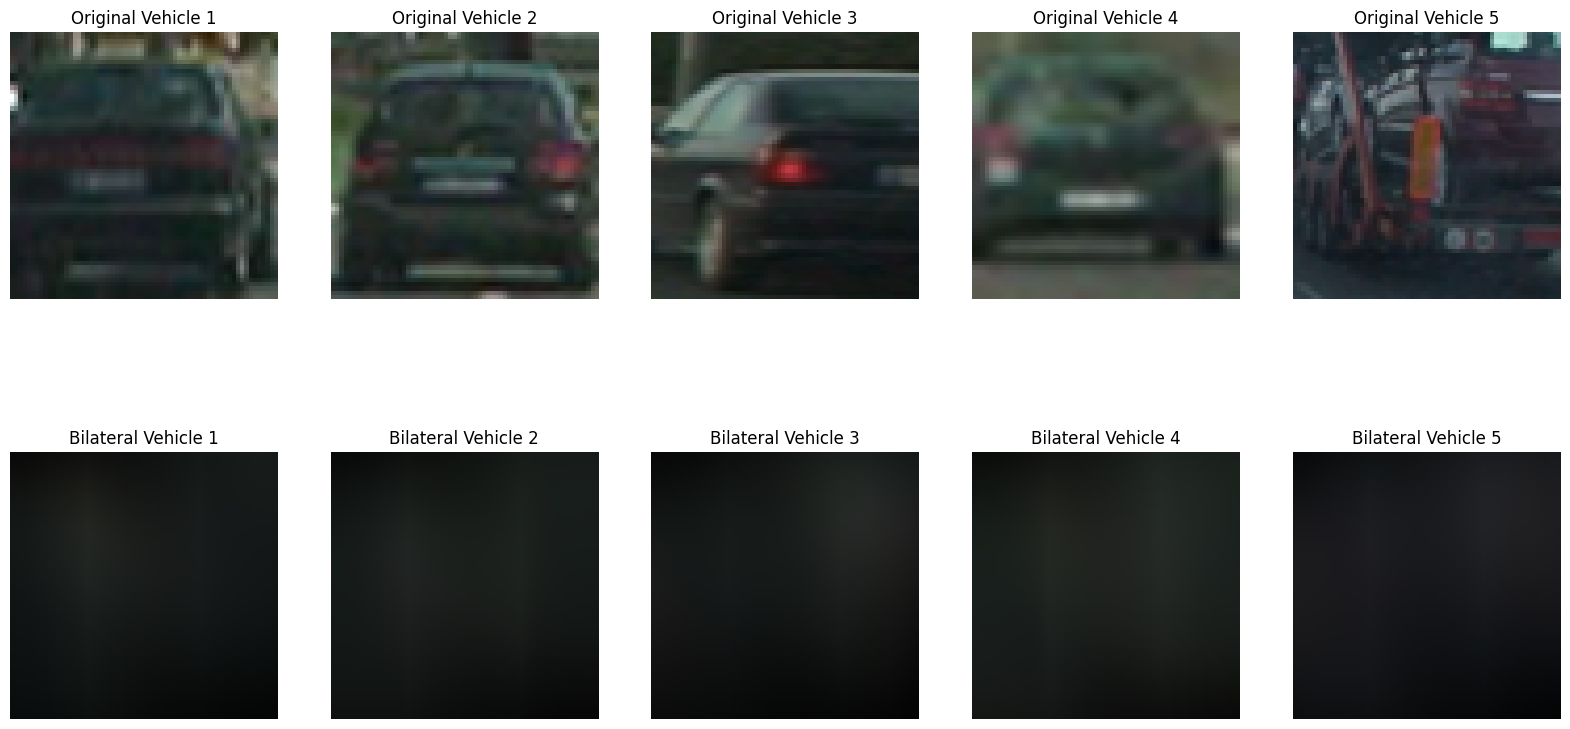

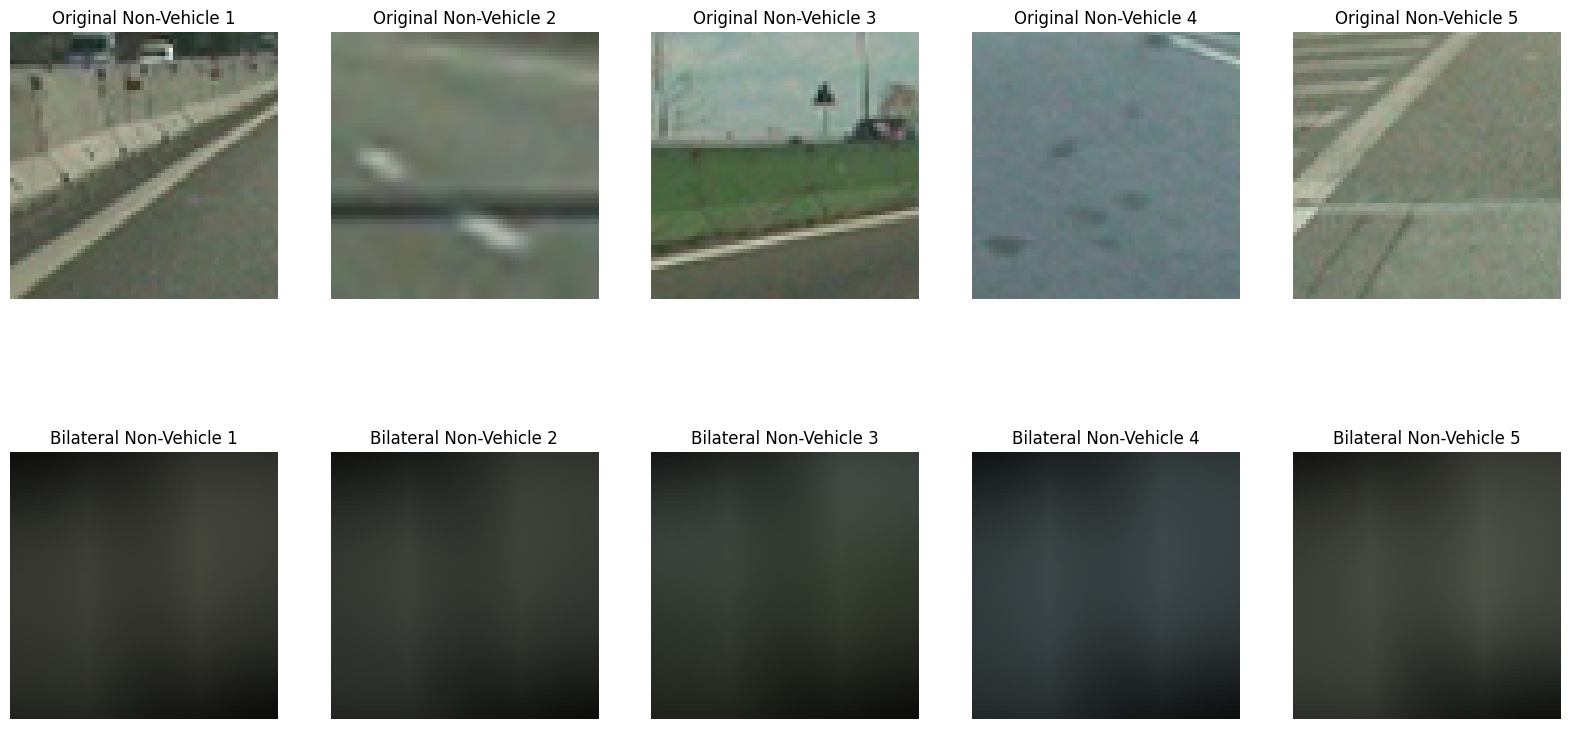

In [24]:
# Display vehicle images
display_images(vehicle[:5], denoised_vehicle_bilateral_colored[:5], 'Vehicle')
    
# Display non-vehicle images
display_images(nonvehicle[:5], denoised_nonvehicle_bilateral_colored[:5], 'Non-Vehicle')

In [19]:
# Function to display images
def display_images(original_paths, denoised_images_bilateral, title):
    n = len(original_paths)
    plt.figure(figsize=(20, 10))
    for i in range(n):
        # Display original image
        plt.subplot(2, n, i + 1)
        original_img = io.imread(original_paths[i])
        plt.imshow(original_img)
        plt.title(f'Original {title} {i+1}')
        plt.axis('off')
        
        # Display bilateral denoised image
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(denoised_images_bilateral[i])
        plt.title(f'Bilateral {title} {i+1}')
        plt.axis('off')
    plt.show()

# Display vehicle images
display_images(vehicle[:5], denoised_vehicle_bilateral_colored[:5], 'Vehicle')

# Display non-vehicle images
display_images(nonvehicle[:5], denoised_nonvehicle_bilateral_colored[:5], 'Non-Vehicle')

NameError: name 'denoised_vehicle_bilateral_colored' is not defined

### Reduce computational power

#### Reduce computational power needed to finish denoising the dataset quicker
- Parallel Processing


In [ ]:
# Function to display images
def display_images(original_paths, denoised_images, title):
    n = len(original_paths)
    plt.figure(figsize=(20, 10))
    for i in range(n):
        # Display original image
        plt.subplot(2, n, i + 1)
        original_img = io.imread(original_paths[i])
        plt.imshow(original_img)
        plt.title(f'Original {title} {i+1}')
        plt.axis('off')
        
        # Display denoised image
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(denoised_images[i])
        plt.title(f'Denoised {title} {i+1}')
        plt.axis('off')
    plt.show()

## now we will try a different type of denoise
- total variation (TV) 

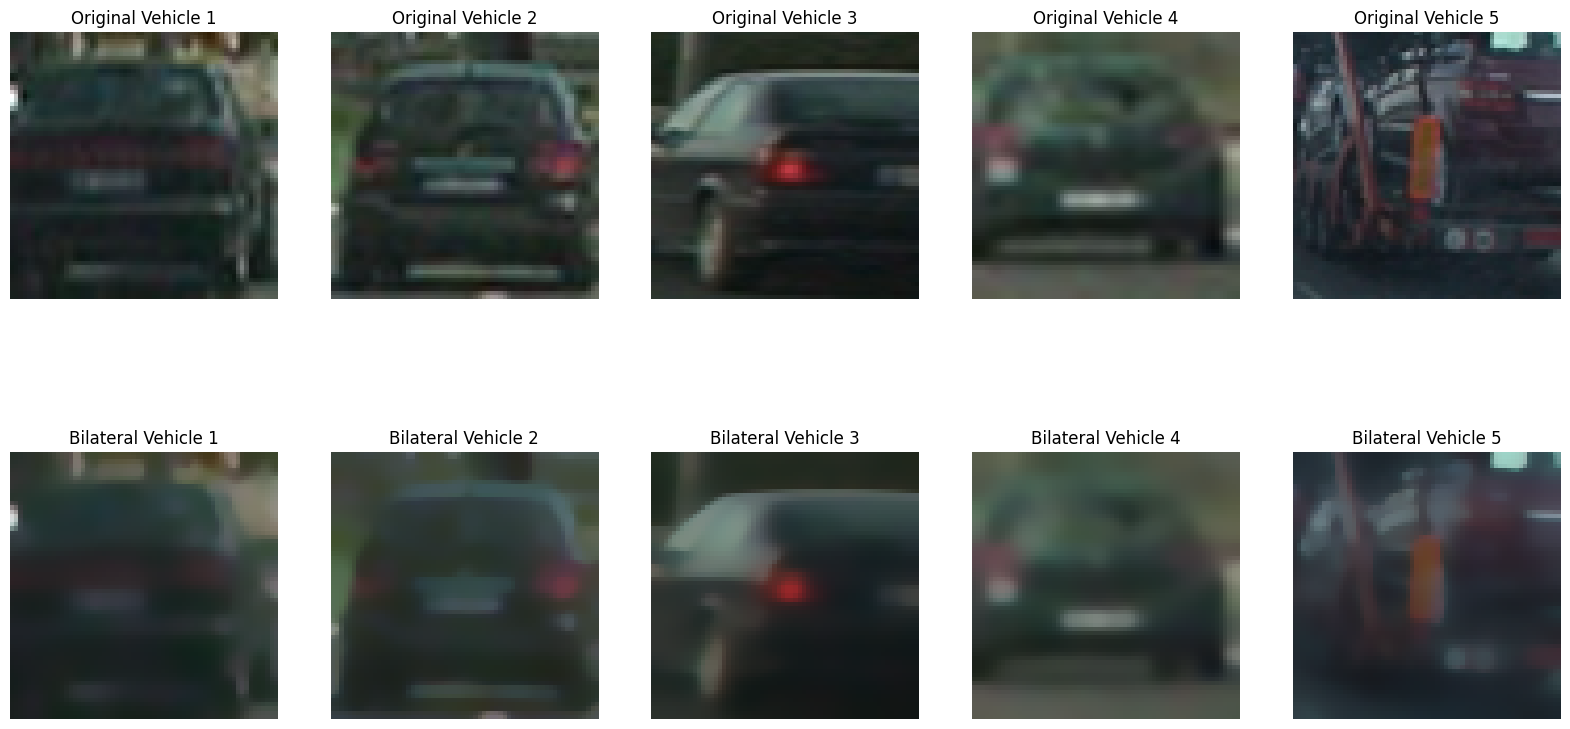

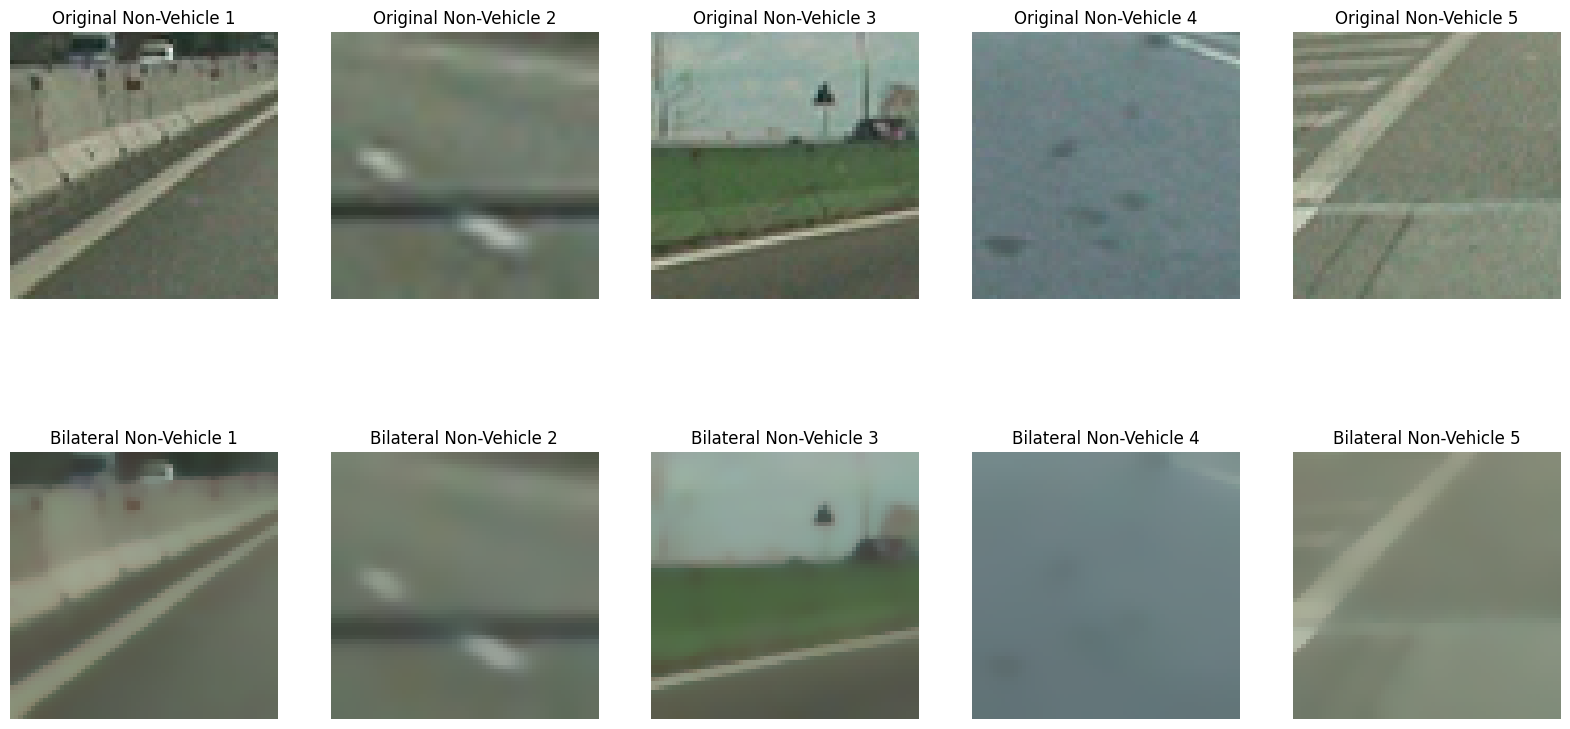

In [28]:
# go thorugh my dataset and apply total variation denoising and show the images before and after the denoising process 
# i want to you to use the total variation denoising method from skimage.restoration module
# and i want to use unique variable names for each variable that you create in this code cell

from skimage.restoration import denoise_tv_chambolle
import glob
import random
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.restoration import denoise_bilateral

# Set the seed for reproducibility
random.seed(0)

# Get image paths
vehicle = sorted(glob.glob('./VehicleImage/vehicles/*/*.png'))
nonvehicle = sorted(glob.glob('./VehicleImage/non-vehicles/*/*.png'))

# Shuffle the image paths
random.shuffle(vehicle)
random.shuffle(nonvehicle)

# Function to denoise images using total variation denoising from skimage
def denoise_image_tv(image_path):
    img = img_as_float(io.imread(image_path))
    denoised_img = denoise_tv_chambolle(img, weight=0.1, channel_axis=-1)
    return denoised_img

# Denoise vehicle images
denoised_vehicle_tv = [denoise_image_tv(img_path) for img_path in vehicle]

# Denoise non-vehicle images
denoised_nonvehicle_tv = [denoise_image_tv(img_path) for img_path in nonvehicle]

# Display vehicle images
display_images(vehicle[:5], denoised_vehicle_tv[:5], 'Vehicle')

# Display non-vehicle images
display_images(nonvehicle[:5], denoised_nonvehicle_tv[:5], 'Non-Vehicle')

